# 20 Newsgroups
- http://qwone.com/~jason/20Newsgroups/

# データセットの準備

In [1]:
from sklearn.datasets import fetch_20newsgroups

# データをfetch(最初はダウンロードするので少々時間がかる)
newsgroups_train = fetch_20newsgroups(subset='train',
                                      shuffle=True,
                                      random_state=42)

# データをfetch(最初はダウンロードするので少々時間がかる)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     shuffle=True,
                                     random_state=42)

In [2]:
# カテゴリの確認
newsgroups_test.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
print(newsgroups_train.target.size)
print(newsgroups_test.target.size)

11314
7532


In [4]:
print(newsgroups_train.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



# テキストデータのベクトル化

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

vect.fit(newsgroups_train.data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [6]:
X_train = vect.transform(newsgroups_train.data)

X_test = vect.transform(newsgroups_test.data)

In [7]:
X_train.shape, X_test.shape

((11314, 130107), (7532, 130107))

In [8]:
y_train = newsgroups_train.target

y_test = newsgroups_test.target

In [9]:
y_train.shape, y_test.shape

((11314,), (7532,))

# モデルを構築

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9698603500088386
0.8279341476367499


# メトリクス

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg.predict(X_test)

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[236,   2,   0,   0,   1,   1,   3,   0,   3,   3,   1,   1,   2,
          9,   2,  35,   3,   4,   1,  12],
       [  2, 304,  13,   8,   8,  19,   7,   1,   0,   1,   0,   4,  10,
          1,   5,   2,   1,   1,   1,   1],
       [  1,  21, 294,  31,  12,  10,   2,   2,   1,   5,   0,   1,   1,
          2,   4,   2,   0,   0,   4,   1],
       [  0,  12,  24, 283,  22,   2,  13,   3,   1,   1,   1,   1,  24,
          0,   4,   0,   0,   0,   0,   1],
       [  0,   5,   6,  21, 319,   1,  11,   1,   1,   5,   1,   0,  10,
          0,   1,   0,   0,   0,   3,   0],
       [  0,  41,  38,   5,   4, 292,   3,   0,   1,   1,   0,   1,   3,
          2,   4,   0,   0,   0,   0,   0],
       [  0,   3,   2,  12,   7,   0, 351,   3,   2,   1,   1,   0,   7,
          1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   4,   0,   2,  12, 352,   4,   2,   0,   0,  13,
          1,   1,   0,   1,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   6,  10, 379,   2,   0,  

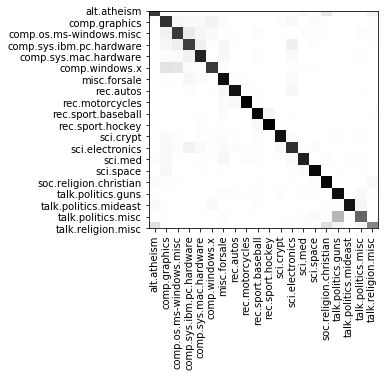

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.gray()

plt.imshow(1 - conf_mat / conf_mat.sum(axis=1),
           interpolation='nearest')

plt.yticks(range(20), newsgroups_train.target_names)
plt.xticks(range(20), newsgroups_train.target_names, rotation=90)

plt.show()